In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from utils import get_data

/tmp/ipykernel_719809/3376823894.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = get_data('CMA_ES-08_02-09_38', '7_0', True, True)

# Obtém as 10 melhores soluções
df = df.sort_values(by='P_B')
df = df.iloc[:10]

In [3]:
df

,V_S,Z,D,AEdAO,PdD,P_B,Generation,Run,Valid
11399,7.0,5,0.799998,0.631867,0.669377,81.400804,27,0,True
10452,7.0,5,0.799999,0.630767,0.667453,81.400900,17,0,True
11333,7.0,5,0.800000,0.631898,0.669373,81.400930,26,0,True
11461,7.0,5,0.799999,0.631891,0.669372,81.400967,27,0,True
11239,7.0,5,0.800000,0.631949,0.669374,81.400997,25,0,True
11616,7.0,5,0.800000,0.631347,0.668461,81.401022,29,0,True
11442,7.0,5,0.799999,0.631927,0.669372,81.401110,27,0,True
10990,7.0,5,0.800000,0.631045,0.667884,81.401216,23,0,True
11549,7.0,5,0.800000,0.631831,0.669359,81.401242,28,0,True
11414,7.0,5,0.799999,0.631957,0.669464,81.401256,27,0,True


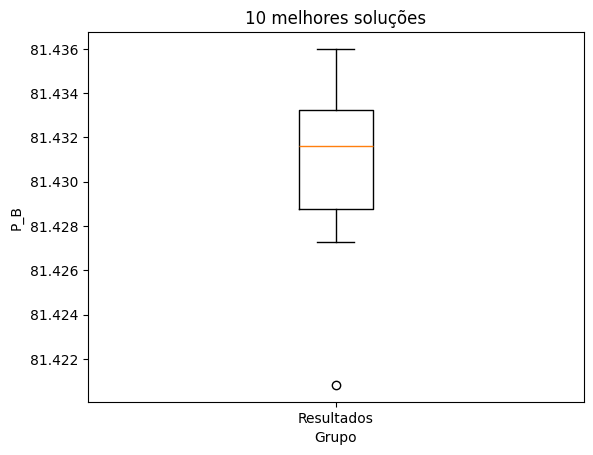

In [8]:
data = [df['P_B']]

plt.boxplot(data, labels=['Resultados'])

# Formatar o eixo y para exibir três casas antes da vírgula e duas casas decimais
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Definir o título e os rótulos dos eixos
plt.title('10 melhores soluções')
plt.xlabel('Grupo')
plt.ylabel('P_B')

plt.show()